In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('K_mean_clustering.csv')

In [3]:
df.head()

,Names,Age,Income(N)
0,Rob,27,70000
1,micheal,29,90000
2,mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


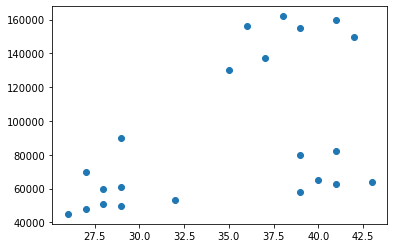

In [4]:
plt.scatter(df['Age'], df['Income(N)'])

In [5]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age', 'Income(N)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['Cluster'] = y_predicted
df

,Names,Age,Income(N),Cluster
0,Rob,27,70000,2
1,micheal,29,90000,2
2,mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


No handles with labels found to put in legend.


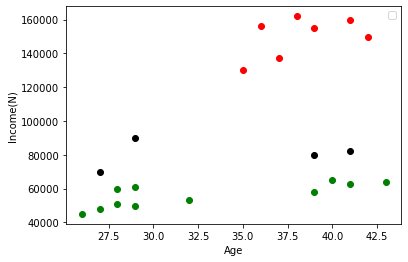

In [8]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age, df1['Income(N)'], color = 'green')
plt.scatter(df2.Age, df2['Income(N)'], color = 'red')
plt.scatter(df3.Age, df3['Income(N)'], color = 'black')

plt.xlabel('Age')
plt.ylabel('Income(N)')
plt.legend()

In [9]:
df1.Age

2     29
3     28
11    26
12    27
13    28
14    29
15    32
16    40
17    41
18    43
21    39
Name: Age, dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
Scaler = MinMaxScaler()
Scaler.fit(df[['Income(N)']])
df[['Income(N)']] = Scaler.transform(df[['Income(N)']])

Scaler.fit(df[['Age']])
df[['Age']] = Scaler.transform(df[['Age']])
df

,Names,Age,Income(N),Cluster
0,Rob,0.058824,0.213675,2
1,micheal,0.176471,0.384615,2
2,mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [12]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income(N)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [13]:
df['Cluster'] = y_predicted
df.drop('Cluster', axis = 'columns')
df

,Names,Age,Income(N),Cluster
0,Rob,0.058824,0.213675,1
1,micheal,0.176471,0.384615,1
2,mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [14]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

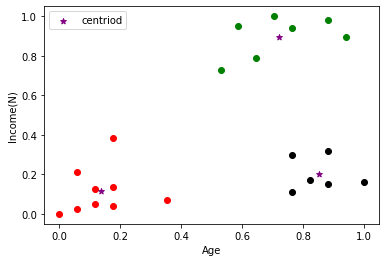

In [15]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age, df1['Income(N)'], color = 'green')
plt.scatter(df2.Age, df2['Income(N)'], color = 'red')
plt.scatter(df3.Age, df3['Income(N)'], color = 'black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centriod')

plt.xlabel('Age')
plt.ylabel('Income(N)')
plt.legend()

In [19]:
df1.Age

4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
Name: Age, dtype: float64

In [16]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income(N)']])
    sse.append(km.inertia_)
    

C:\Users\TOBY CYBERWORLD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22443334487241415,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

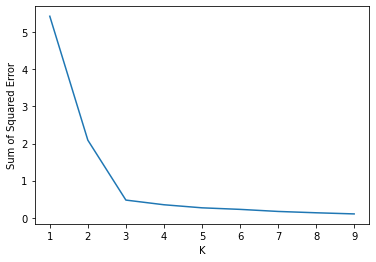

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)